##### 影像模糊化
這篇教學會介紹 OpenCV 四種影像模糊化的方法 ( blur()、GaussianBlur()、medianBlur()、bilateralFilter() )，\
透過這些方法，將影像套用模糊化的效果，輸出成為新的影像。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### blur() 平均模糊 
使用 OpenCV 的 blur() 方法，可以計算指定區域所有像素的平均值，再將平均值取代中心像素，使用方法如下：

In [ ]:
cv2.blur(img, ksize)
# img 來源影像
# ksize 指定區域單位

指定區域單位設定的範圍越大，則模糊的效果越明顯，下面的例子會產生兩張模糊化的影像。

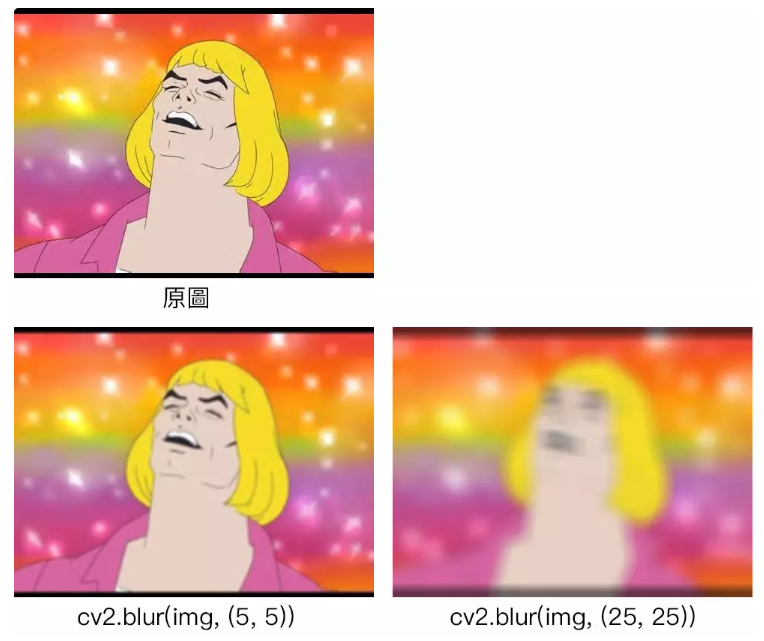

In [ ]:
import cv2
img = cv2.imread('meme.jpg')
output1 = cv2.blur(img, (5, 5))     # 指定區域單位為 (5, 5)
output2 = cv2.blur(img, (25, 25))   # 指定區域單位為 (25, 25)
cv2.imshow('oxxostudio1', output1)
cv2.imshow('oxxostudio2', output2)
cv2.waitKey(0)                      # 按下任意鍵停止
cv2.destroyAllWindows()

##### GaussianBlur() 高斯模糊 
使用 OpenCV 的 GaussianBlur() 方法，可以使用高斯分佈進行模糊化的計算，\
指定模糊區域單位 ( 必須是大於 1 的奇數 ) 後就能產生不同程度的模糊效果，\
使用方法如下：

In [ ]:
cv2.GaussianBlur(img, ksize, sigmaX, sigmaY)
# img 來源影像
# ksize 指定區域單位 ( 必須是大於 1 的奇數 )
# sigmaX X 方向標準差，預設 0，sigmaY Y 方向標準差，預設 0

指定區域單位設定的範圍越大，則模糊的效果越明顯，下面的例子會產生兩張高斯模糊化的影像。

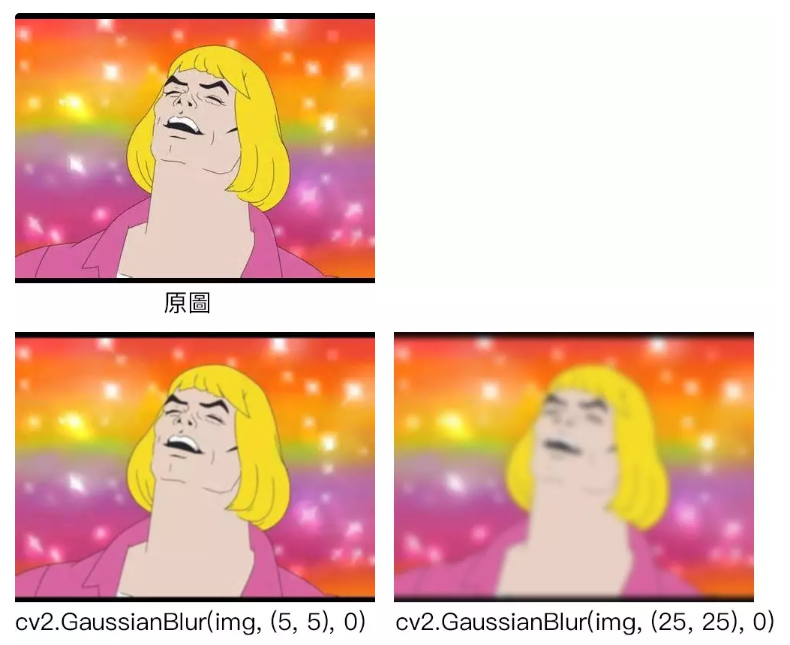

In [ ]:
import cv2
img = cv2.imread('meme.jpg')
output1 = cv2.GaussianBlur(img, (5, 5), 0)   # 指定區域單位為 (5, 5)
output2 = cv2.GaussianBlur(img, (25, 25), 0) # 指定區域單位為 (25, 25)
cv2.imshow('oxxostudio1', output1)
cv2.imshow('oxxostudio2', output2)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### medianBlur() 中值模糊 
使用 OpenCV 的 medianBlur() 方法，可以使用像素點周圍灰度值的中值，來代替該像素點的灰度值，\
模糊程度 ( 必須是大於 1 的奇數 )，使用方法如下：

In [ ]:
cv2.medianBlur(img, ksize)
# img 來源影像
# ksize 模糊程度 ( 必須是大於 1 的奇數 )

模糊程度設定的數值越大，則模糊的效果越明顯，下面的例子會產生兩張中值模糊化的影像。

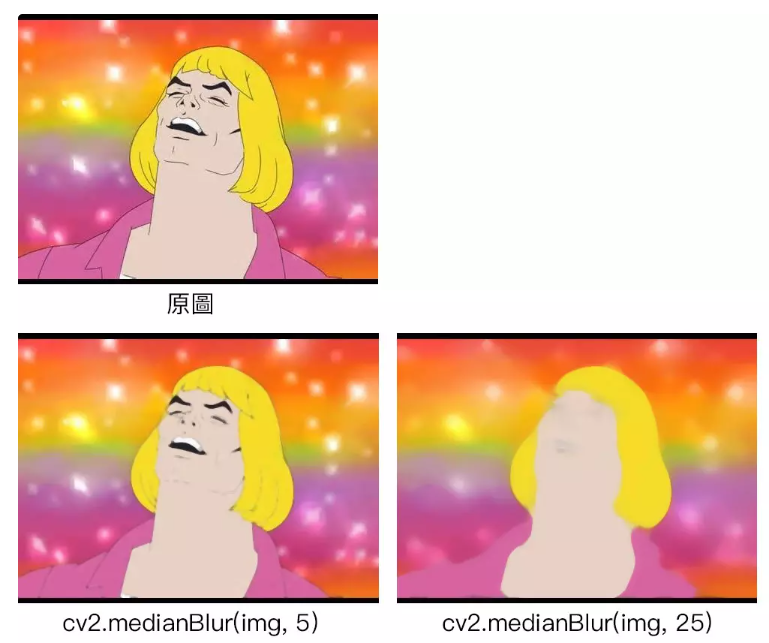

In [ ]:
import cv2
img = cv2.imread('meme.jpg')
output1 = cv2.medianBlur(img, 5)   # 模糊程度為 5
output2 = cv2.medianBlur(img, 25)  # 模糊程度為 25
cv2.imshow('oxxostudio1', output1)
cv2.imshow('oxxostudio2', output2)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### bilateralFilter() 雙邊模糊 
使用 OpenCV 的 bilateralFilter() 方法，可以透過非線性的雙邊濾波器進行計算，讓影像模糊化的同時，也能夠保留影像內容的邊緣，使用方法如下：

In [ ]:
cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)
# img 來源影像
# d 相鄰像素的直徑，預設使用 5，數值越大運算的速度越慢
# sigmaColor 相鄰像素的顏色混合，數值越大，會混合更多區域的顏色，並產生更大區塊的同一種顏色
# sigmaSpace 會影響像素的區域，數值越大，影響的範圍就越大，影響的像素就越多

下面的例子會產生三張雙邊模糊的影像。

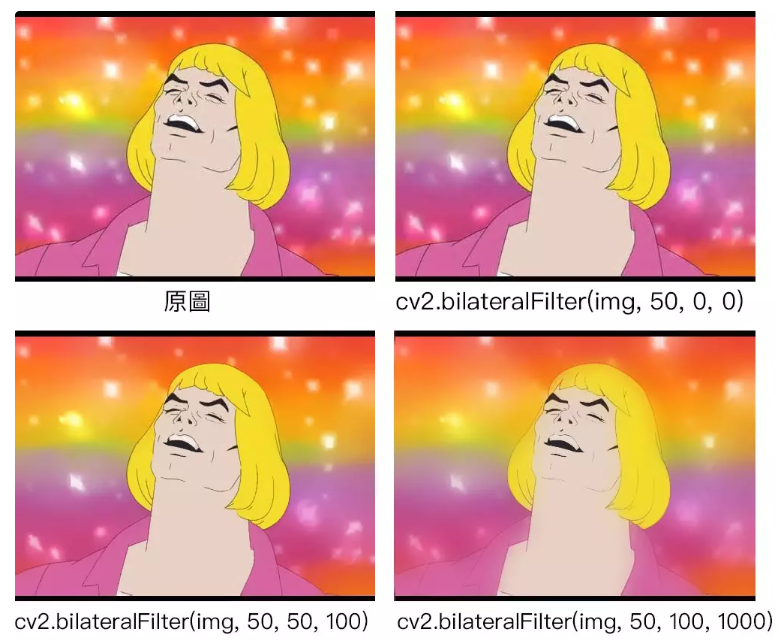

In [ ]:
import cv2
img = cv2.imread('meme.jpg')
output1 = cv2.bilateralFilter(img, 50, 0, 0)
output2 = cv2.bilateralFilter(img, 50, 50, 100)
output3 = cv2.bilateralFilter(img, 50, 100, 1000)
cv2.imshow('oxxostudio1', output1)
cv2.imshow('oxxostudio2', output2)
cv2.imshow('oxxostudio3', output3)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 影片的模糊效果 
延伸「讀取並播放影片」文章的範例，在程式碼中使用 medianBlur() 中值模糊方法，就能將電腦鏡頭拍攝的畫面，即時轉換成模糊化的影像。

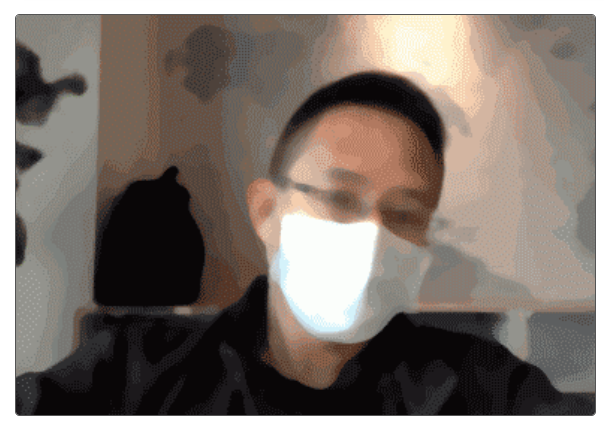

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    # 套用 medianBlur() 中值模糊
    img = cv2.medianBlur(frame, 25)
    cv2.imshow('oxxostudio', img)
    if cv2.waitKey(1) == ord('q'):
        break     # 按下 q 鍵停止
cap.release()
cv2.destroyAllWindows()